In [1]:
from IPython import display
import gymnasium as gym
from gymnasium.wrappers import TimeLimit
from agents import Agent
from utils import Episode, Experiment, gym_interpreter1

%reload_ext autoreload
%autoreload 2

In [2]:
class Q_learning(Agent):
    '''
    Implements a Q-learning rule.
    '''

    def __init__(self, parameters: dict):
        super().__init__(parameters)
        self.alpha = self.parameters["alpha"]
        self.debug = False
   
    def update(self, next_state, reward, done):
        '''
        Agent updates its model.
        '''
        # obtain previous state
        state = self.states[-1]
        # obtain previous action
        action = self.actions[-1]
        # Find bootstrap
        maxQ = self.max_Q(next_state) 
        estimate = reward + self.gamma*maxQ
        # Obtain delta
        delta = estimate - self.Q[state, action]
        # Update Q value
        prev_Q = self.Q[state, action]
        self.Q[state, action] = prev_Q + self.alpha*delta
        # Update policy
        self.update_policy(state)      
        if self.debug:
            print("")
            print(dash_line)
            print(f"Learning log:")
            print(f"state:{state}")
            print(f"action:{action}")
            print(f"reward:{reward}")
            print(f"estimate:{estimate}")
            print(f"Previous Q:{prev_Q}")
            print(f"delta:{delta}")
            print(f"New Q:{self.Q[state, action]}")

In [3]:
max_rounds = 200

# Create environment
env = gym.make("Taxi-v3", render_mode="rgb_array")
env = TimeLimit(env, max_episode_steps=max_rounds)

# Create agent
parameters = {
    "nS": env.observation_space.n,
    "nA": env.action_space.n,
    "gamma": 0.99,
    "epsilon": 0,
    "alpha": 1
}

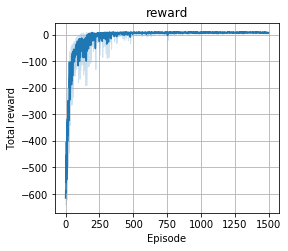

Average sum of rewards:
 model
Q Learning   -86.869333
Name: reward, dtype: float64

Episode termination percentage:
 model
Q Learning    976.133333
Name: done, dtype: float64


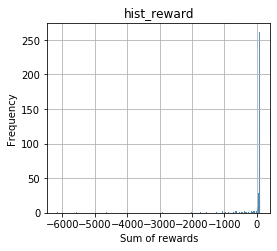

In [4]:
agent = Q_learning(parameters=parameters)

# Create experiment
experimento = Experiment(environment=env,\
                        env_name="Taxi",\
                        num_rounds=max_rounds,\
                        num_episodes=1500,\
                        num_simulations=10,
                        state_interpreter=gym_interpreter1)

# Train agent
agentes = experimento.run_experiment(agents=[agent],\
                                  names=["Q Learning"],\
                                  measures=["reward", "hist_reward"],\
                                  learn=True)


Average sum of rewards:
 model
Q Learning    7.572
Name: reward, dtype: float64

Episode termination percentage:
 model
Q Learning    100
Name: done, dtype: int32


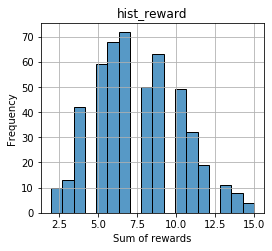

In [5]:
# Shut down exploration
agent = agentes[0]
agent.epsilon = 0
for s in range(env.observation_space.n):
    agent.update_policy(s)

# Create experiment
experimento = Experiment(environment=env,\
                 env_name='Taxi',\
                 num_rounds=max_rounds,\
                 num_episodes=500,\
                 num_simulations=1,
                 state_interpreter=gym_interpreter1
                 )
# Use stored agents to run test
experimento.run_experiment(
                agents=[agent],\
                names=["Q Learning"],\
                measures=["hist_reward"],\
                learn=False)

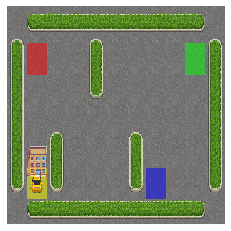

Moviepy - Building video C:\Users\ACER\Documents\IA\Proyecto 3\proyecto\trained_taxi/rl-video-episode-0.mp4.
Moviepy - Writing video C:\Users\ACER\Documents\IA\Proyecto 3\proyecto\trained_taxi/rl-video-episode-0.mp4

Moviepy - Done !
Moviepy - video ready C:\Users\ACER\Documents\IA\Proyecto 3\proyecto\trained_taxi/rl-video-episode-0.mp4


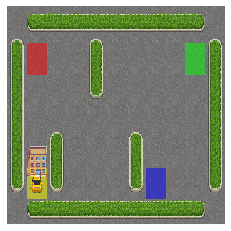

In [6]:
# Create episode
episodio = Episode(environment=env,\
                   env_name="Taxi",\
                   agent=agent,\
                   model_name="Q_learning",\
                   num_rounds=max_rounds,\
                   state_interpreter=gym_interpreter1)

# Visualize
episodio.renderize(to_video=True, file="trained_taxi")

t:  16%|████▍                      | 33/200 [00:00<00:00, 329.80it/s, now=None]

Moviepy - Building video C:\Users\ACER\Documents\IA\Proyecto 3\proyecto\not_trained_taxi/rl-video-episode-0.mp4.
Moviepy - Writing video C:\Users\ACER\Documents\IA\Proyecto 3\proyecto\not_trained_taxi/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\ACER\Documents\IA\Proyecto 3\proyecto\not_trained_taxi/rl-video-episode-0.mp4


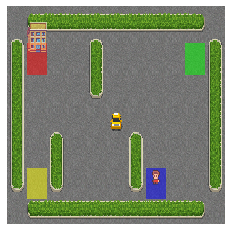

In [7]:
agent = Q_learning(parameters=parameters)

# Create episode
episodio = Episode(environment=env,\
                   env_name="Taxi",\
                   agent=agent,\
                   model_name="Q_learning",\
                   num_rounds=max_rounds,\
                   state_interpreter=gym_interpreter1)

# Visualize
episodio.renderize(to_video=True, file="not_trained_taxi")